In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
#plt.rcParams['figure.figsize'] = (10, 5)
#plt.style.use('tableau-colorblind10')

In [3]:
for style in plt.style.available:
    print(style) 

bmh
classic
dark_background
fast
fivethirtyeight
ggplot
grayscale
seaborn-bright
seaborn-colorblind
seaborn-dark-palette
seaborn-dark
seaborn-darkgrid
seaborn-deep
seaborn-muted
seaborn-notebook
seaborn-paper
seaborn-pastel
seaborn-poster
seaborn-talk
seaborn-ticks
seaborn-white
seaborn-whitegrid
seaborn
Solarize_Light2
tableau-colorblind10
_classic_test


In [4]:
data_folder = '..\data\Clean UW'
#data_folder = 'Clean WF'

In [5]:
def load_sensor_csv_to_data_frame(path):
    """
    Return a Dataframe of the csv provided in the path.
    
    Notes
    -----
    This assumes the csv is properly formatted.
    This creates a Timestamp column.
    This drops NA Timestamp rows.
    This sets Timestamp to the index (use df.index to access)
    """
    # https://numpy.org/doc/stable/user/basics.types.html
    data_types = {
            'Date':str,
            'Time':str,
            'Battery':np.float64,
            'Fix':np.int32, # <- always zero?
            'Latitude':np.float64,
            'Longitude':np.float64,
            'Dp>0.3':np.int32,
            'Dp>0.5':np.int32,
            'Dp>1.0':np.int32,
            'Dp>2.5':np.int32,
            'Dp>5.0':np.int32,
            'Dp>10.0':np.int32,
            'PM1_Std':np.int32,
            'PM2.5_Std':np.int32,
            'PM10_Std':np.int32,
            'PM1_Env':np.int32,
            'PM2.5_Env':np.int32,
            'PM10_Env':np.int32,
            'Temp(C)':np.float64,
            'RH(%)':np.float64, 
            'P(hPa)':np.float64, 
            'Alti(m)':np.float64,
            }
    print("Reading {}".format(path))
    df = pd.read_csv(path, 
                     dtype=data_types)
    
    df.attrs['name'] = os.path.splitext(os.path.split(path)[1])[0]
    
    df['Timestamp'] = df['Date'] + ' ' + df['Time']
    df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')
    
    
    na_count = df[df['Timestamp'].isnull()].shape[0]
    if na_count > 0:
        count = df.shape[0]
        print(" - Dropping {} null rows out of {} rows, {:.3}%".format(na_count, count, na_count/count/100.))
        df = df[df['Timestamp'].notnull()]
    df.set_index('Timestamp', inplace=True)
    
    return df

In [6]:
def load_folder(folder):
    """
    Return a list of Dataframe from csv files in the folder path.
    
    Notes
    -----
    This assumes the csv is properly formatted.
    This creates a Timestamp column.
    This drops NA Timestamp rows.
    This sets Timestamp to the index (use df.index to access)
    """
    data = []
    for _, _, files in os.walk(folder):
        for file_name in files:
            if os.path.splitext(file_name)[-1] == '.csv':
                filepath = os.path.join(folder, file_name)
                data.append(load_sensor_csv_to_data_frame(filepath))
    return data

In [7]:
data = load_folder(data_folder)

Reading ..\data\Clean UW\Beta-01.csv
 - Dropping 22 null rows out of 2506 rows, 8.78e-05%
Reading ..\data\Clean UW\Beta-03.csv
Reading ..\data\Clean UW\Beta-06.csv
 - Dropping 17 null rows out of 1395 rows, 0.000122%
Reading ..\data\Clean UW\Beta-07.csv
 - Dropping 37 null rows out of 1376 rows, 0.000269%
Reading ..\data\Clean UW\Beta-11.csv
Reading ..\data\Clean UW\Beta-12.csv
 - Dropping 1356 null rows out of 1356 rows, 0.01%
Reading ..\data\Clean UW\Beta-14.csv
 - Dropping 6 null rows out of 1449 rows, 4.14e-05%
Reading ..\data\Clean UW\Beta-16.csv
 - Dropping 144 null rows out of 1490 rows, 0.000966%
Reading ..\data\Clean UW\Beta-17.csv
 - Dropping 166 null rows out of 1361 rows, 0.00122%
Reading ..\data\Clean UW\Beta-18.csv
 - Dropping 118 null rows out of 1423 rows, 0.000829%
Reading ..\data\Clean UW\Breakout-01.csv
 - Dropping 2 null rows out of 1260 rows, 1.59e-05%
Reading ..\data\Clean UW\Breakout-02.csv
Reading ..\data\Clean UW\Breakout-06.csv
Reading ..\data\Clean UW\Breakou

In [8]:
df = load_sensor_csv_to_data_frame('..\data\Clean UW\Beta-06.csv')

Reading ..\data\Clean UW\Beta-06.csv
 - Dropping 17 null rows out of 1395 rows, 0.000122%


In [9]:
df.attrs['name']

'Beta-06'

In [10]:
df.dtypes

Date          object
Time          object
Battery      float64
Fix            int32
Latitude     float64
Longitude    float64
Dp>0.3         int32
Dp>0.5         int32
Dp>1.0         int32
Dp>2.5         int32
Dp>5.0         int32
Dp>10.0        int32
PM1_Std        int32
PM2.5_Std      int32
PM10_Std       int32
PM1_Env        int32
PM2.5_Env      int32
PM10_Env       int32
Temp(C)      float64
RH(%)        float64
P(hPa)       float64
Alti(m)      float64
dtype: object

In [11]:
df.describe()

,Battery,Fix,Latitude,Longitude,Dp>0.3,Dp>0.5,Dp>1.0,Dp>2.5,Dp>5.0,Dp>10.0,PM1_Std,PM2.5_Std,PM10_Std,PM1_Env,PM2.5_Env,PM10_Env,Temp(C),RH(%),P(hPa),Alti(m)
count,1378.000000,1378.0,1378.0,1378.0,1378.000000,1378.000000,1378.000000,1378.000000,1378.000000,1378.000000,1378.000000,1378.000000,1378.000000,1378.000000,1378.000000,1378.000000,1378.000000,1378.000000,1378.000000,1378.000000
mean,3.930506,0.0,0.0,0.0,131.420900,39.054427,3.420900,0.437591,0.336720,0.148766,0.204644,0.317126,0.536284,0.204644,0.317126,0.536284,23.518541,42.585225,101970.350984,-53.598121
std,0.049924,0.0,0.0,0.0,209.083069,61.445389,13.581404,2.020795,1.316275,0.789594,1.169787,1.953418,2.669754,1.169787,1.953418,2.669754,0.737478,1.563655,114.952430,9.490825
min,3.830000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.570000,32.768555,101671.578125,-132.393570
25%,3.888750,0.0,0.0,0.0,60.000000,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.510000,41.316895,101875.468750,-61.253787
50%,3.935000,0.0,0.0,0.0,90.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.740000,42.826172,101966.718750,-53.290672
75%,3.973750,0.0,0.0,0.0,135.000000,40.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.809999,43.752930,102062.892578,-45.729992
max,4.025000,0.0,0.0,0.0,3927.000000,878.000000,223.000000,36.000000,17.000000,13.000000,16.000000,29.000000,43.000000,16.000000,29.000000,43.000000,25.200001,49.280273,102925.320312,-33.407372


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1378 entries, 2020-10-15 14:44:52 to 2020-10-16 12:49:39
Data columns (total 22 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1378 non-null   object 
 1   Time       1378 non-null   object 
 2   Battery    1378 non-null   float64
 3   Fix        1378 non-null   int32  
 4   Latitude   1378 non-null   float64
 5   Longitude  1378 non-null   float64
 6   Dp>0.3     1378 non-null   int32  
 7   Dp>0.5     1378 non-null   int32  
 8   Dp>1.0     1378 non-null   int32  
 9   Dp>2.5     1378 non-null   int32  
 10  Dp>5.0     1378 non-null   int32  
 11  Dp>10.0    1378 non-null   int32  
 12  PM1_Std    1378 non-null   int32  
 13  PM2.5_Std  1378 non-null   int32  
 14  PM10_Std   1378 non-null   int32  
 15  PM1_Env    1378 non-null   int32  
 16  PM2.5_Env  1378 non-null   int32  
 17  PM10_Env   1378 non-null   int32  
 18  Temp(C)    1378 non-null   float64
 19  RH(%)      1

In [13]:
df.head()

,Date,Time,Battery,Fix,Latitude,Longitude,Dp>0.3,Dp>0.5,Dp>1.0,Dp>2.5,...,PM1_Std,PM2.5_Std,PM10_Std,PM1_Env,PM2.5_Env,PM10_Env,Temp(C),RH(%),P(hPa),Alti(m)
Timestamp,,,,,,,,,,,,,,,,,,,,,
2020-10-15 14:44:52,2020/10/15,14:44:52,4.02500,0,0.0,0.0,192,56,9,0,...,0,0,0,0,0,0,24.910000,32.768555,102922.843750,-132.190018
2020-10-15 14:45:02,2020/10/15,14:45:2,4.02125,0,0.0,0.0,180,57,3,0,...,0,0,0,0,0,0,24.969999,40.691406,102922.000000,-132.120499
2020-10-15 14:45:12,2020/10/15,14:45:12,4.01875,0,0.0,0.0,252,77,3,0,...,0,0,0,0,0,0,25.040001,49.280273,102921.000000,-132.038086
2020-10-15 14:45:22,2020/10/15,14:45:22,4.01875,0,0.0,0.0,276,76,3,3,...,0,0,2,0,0,2,25.100000,42.850586,102925.320312,-132.393570
2020-10-15 14:45:32,2020/10/15,14:45:32,4.02125,0,0.0,0.0,147,41,3,0,...,0,0,0,0,0,0,25.150000,40.178711,102920.921875,-132.032120


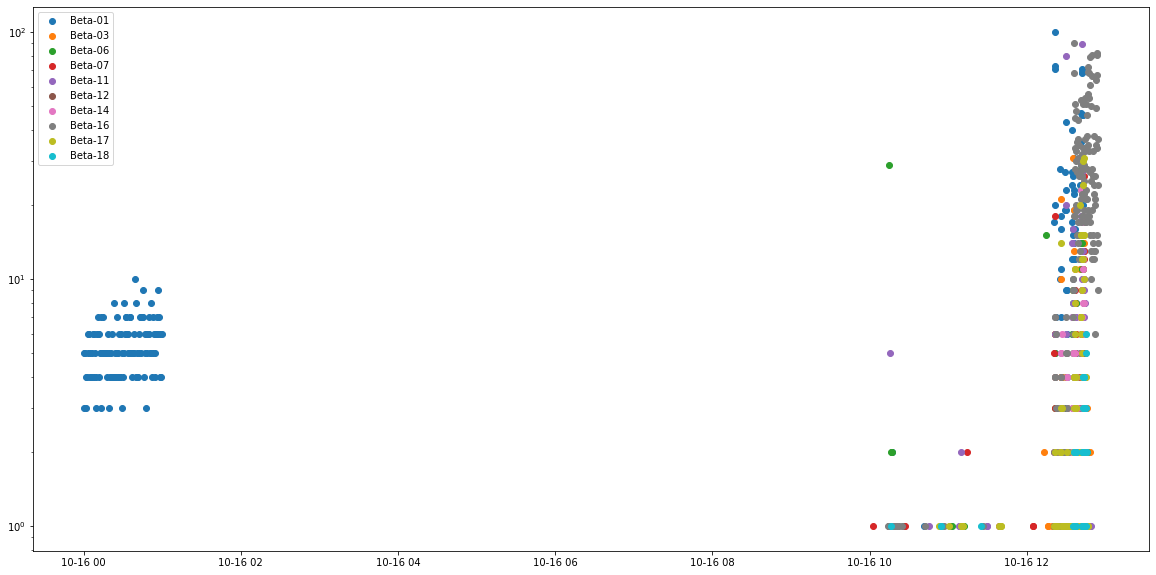

In [22]:
plt.figure(figsize=(20,10))
for df in data:
    if 'Beta' in df.attrs['name']:
        df = df[df["Date"] > "2020/10/15"]
        df = df[df["Time"] < "14:55:00"]
        plt.semilogy(df.index, df['PM2.5_Std'], 'o', label=df.attrs['name'], )
plt.legend()
plt.show()

In [15]:
df = df[df["Date"] > "2020/10/15"]

In [16]:
df

,Date,Time,Battery,Fix,Latitude,Longitude,Dp>0.3,Dp>0.5,Dp>1.0,Dp>2.5,...,PM1_Std,PM2.5_Std,PM10_Std,PM1_Env,PM2.5_Env,PM10_Env,Temp(C),RH(%),P(hPa),Alti(m)
Timestamp,,,,,,,,,,,,,,,,,,,,,
2020-10-16 00:00:07,2020/10/16,0:0:7,3.84125,0,0.0,0.0,825,255,27,0,...,4,5,5,4,5,5,29.930000,22.968750,102513.757812,-98.505203
2020-10-16 00:00:37,2020/10/16,0:0:37,3.84375,0,0.0,0.0,597,199,9,0,...,3,3,3,3,3,3,29.969999,22.933594,102512.062500,-98.365738
2020-10-16 00:01:07,2020/10/16,0:1:7,3.84875,0,0.0,0.0,867,282,14,0,...,4,5,5,4,5,5,30.000000,22.910156,102507.109375,-97.956284
2020-10-16 00:01:37,2020/10/16,0:1:37,3.85125,0,0.0,0.0,672,216,13,0,...,3,3,3,3,3,3,30.030001,22.849609,102508.859375,-98.101738
2020-10-16 00:02:07,2020/10/16,0:2:7,3.85500,0,0.0,0.0,804,261,16,0,...,4,4,4,4,4,4,30.049999,22.814453,102504.906250,-97.774963
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-10-16 12:46:08,2020/10/16,12:46:8,3.88125,0,0.0,0.0,135,45,0,0,...,0,0,0,0,0,0,24.129999,45.493164,101770.609375,-37.034538
2020-10-16 12:46:18,2020/10/16,12:46:18,3.88125,0,0.0,0.0,165,55,0,0,...,0,0,0,0,0,0,24.139999,45.468750,101772.859375,-37.220924
2020-10-16 12:46:28,2020/10/16,12:46:28,3.87875,0,0.0,0.0,144,48,6,0,...,0,0,0,0,0,0,24.129999,45.480469,101773.437500,-37.269024


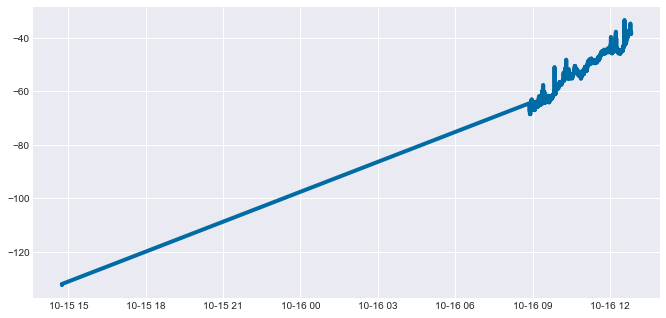

In [50]:
plt.plot(df.index, df['Alti(m)'])

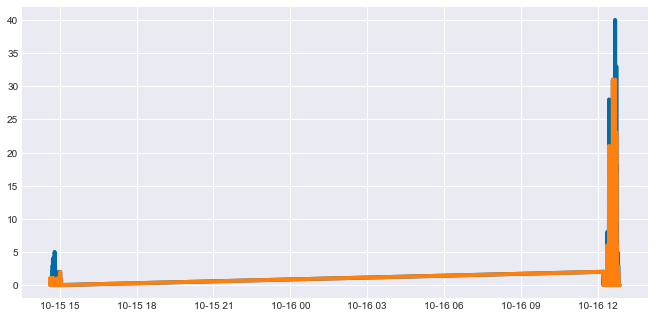

In [48]:
plt.plot(df.index, df['PM10_Std'])
plt.plot(df.index, df['PM2.5_Std'])

In [40]:
df2 = df.rolling(10, center=True).mean()

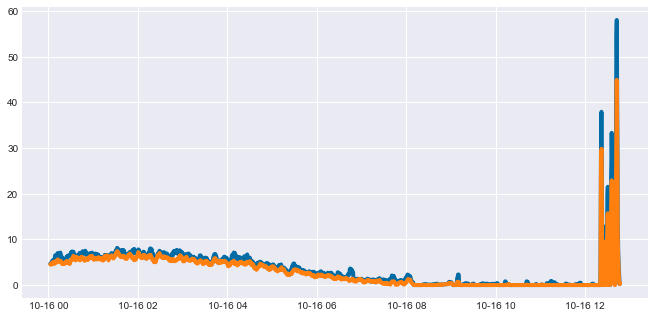

In [41]:
plt.plot(df2.index, df2['PM10_Std'])
plt.plot(df2.index, df2['PM2.5_Std'])

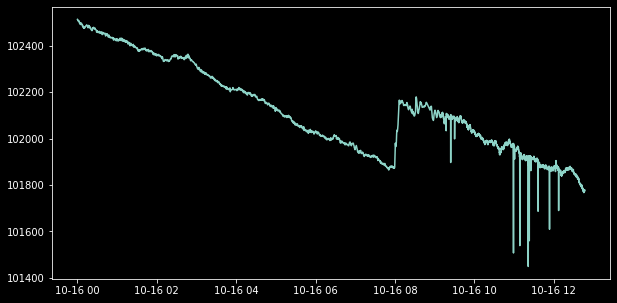

In [18]:
plt.plot(df.index, df['P(hPa)'])

In [14]:
print(df[['Alti(m)', 'P(hPa)']].corr(method='spearman'))

          Alti(m)    P(hPa)
Alti(m)  1.000000 -0.999835
P(hPa)  -0.999835  1.000000


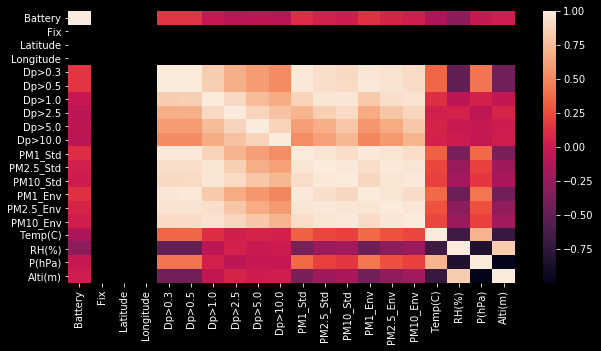

In [15]:
df_corr = df.corr()
sns.heatmap(df_corr)

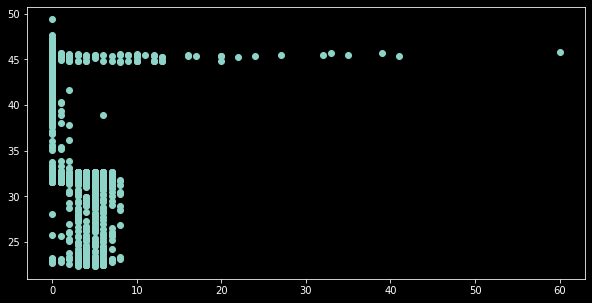

In [16]:
plt.scatter(df['PM1_Std'], df['RH(%)'])

In [17]:
df.columns

Index(['Date', 'Time', 'Battery', 'Fix', 'Latitude', 'Longitude', 'Dp>0.3',
       'Dp>0.5', 'Dp>1.0', 'Dp>2.5', 'Dp>5.0', 'Dp>10.0', 'PM1_Std',
       'PM2.5_Std', 'PM10_Std', 'PM1_Env', 'PM2.5_Env', 'PM10_Env', 'Temp(C)',
       'RH(%)', 'P(hPa)', 'Alti(m)'],
      dtype='object')

In [18]:
df_dp = df[['Dp>0.3','Dp>0.5', 'Dp>1.0', 'Dp>2.5', 'Dp>5.0', 'Dp>10.0']]
df_pm = df[['PM1_Std','PM2.5_Std', 'PM10_Std']]

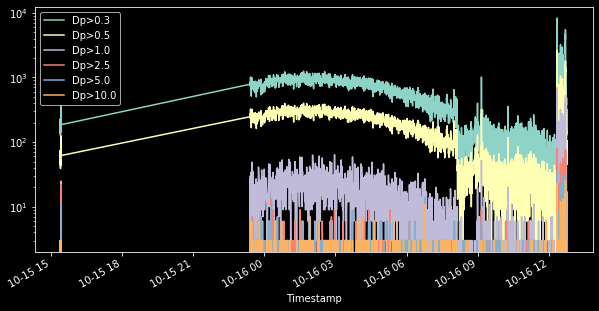

In [19]:
df_dp.plot(logy=True)

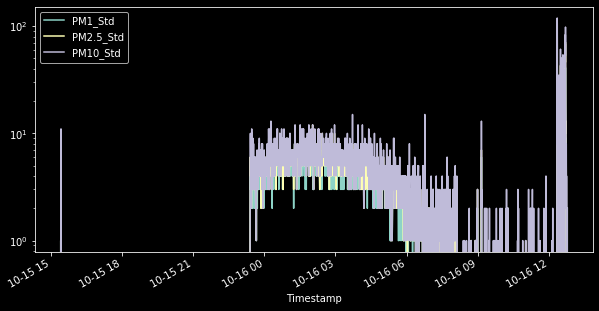

In [20]:
df_pm.plot(logy=True)

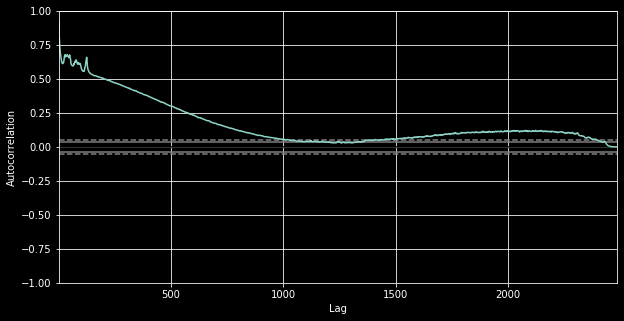

In [21]:
pd.plotting.autocorrelation_plot(df_dp)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002479AFA5A08>],
      dtype=object)

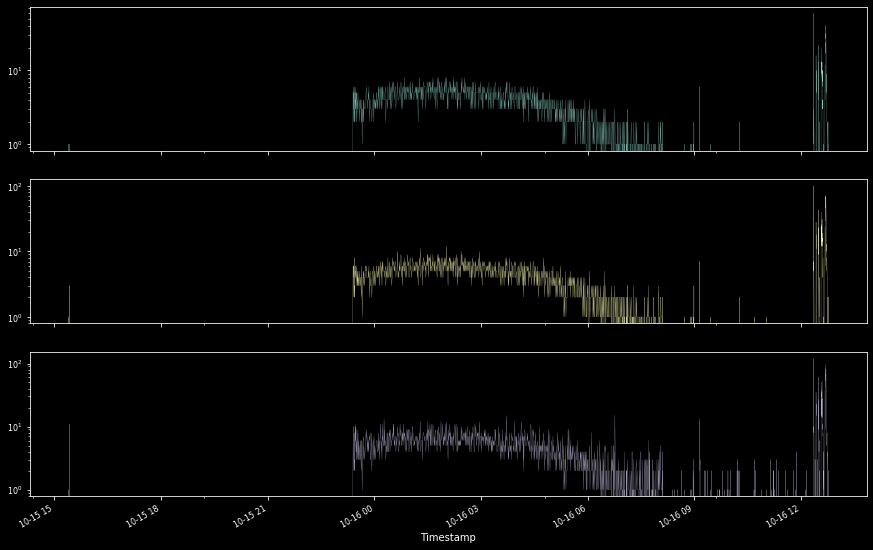

In [22]:
df_pm.plot(subplots=True,
        figsize=(15,10),
        layout=(3,1),
        sharex=True,
        sharey=False,
        fontsize=8,
        legend=False,
        linewidth=0.2,
        logy=True,
       )

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002479B659348>,
      dtype=object)

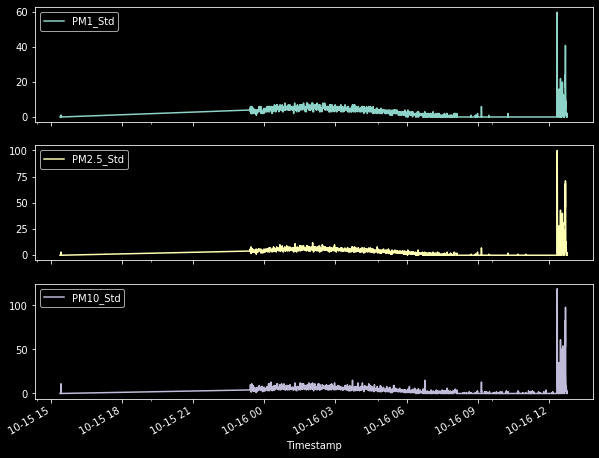

In [23]:
df_pm.plot(subplots=True, figsize=(10,8))

In [24]:
# Rolling average
points = 100
df_rolling = df_pm.rolling(points, center=True).mean()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002479AF900C8>,
      dtype=object)

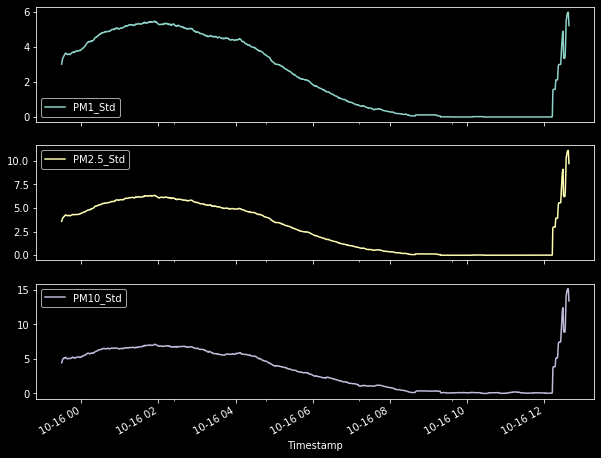

In [25]:
df_rolling.plot(subplots=True, figsize=(10,8))